In [33]:
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [37]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Create an empty DataFrame
df = pd.DataFrame()

# Get a list of all log.txt files in the project directory
log_files = glob.glob('project/*/log.txt')

# Iterate over each log file
for log_file in log_files:
    with open(log_file, 'r') as file:
        for line in file:
            if '# csv,timer' in line:
                header = line.strip().split(',')
            elif '# csv,total' in line:
                line = line.strip().split(',')
                # Create a dictionary with keys from header and values from line
                data_dict = dict(zip(header, line))
                # Delete specified keys from the dictionary
                del data_dict['uname.node']
                del data_dict['user']
                del data_dict['uname.system']
                del data_dict['platform.version']
                del data_dict['msg']
                del data_dict['start']
                del data_dict['sum']
                del data_dict['# csv']
                del data_dict['status']
                del data_dict['timer']
                # Append data_dict to df
                df = pd.concat([df, pd.DataFrame(data_dict, index=[0])], ignore_index=True)


df['time'] = df['time'].astype(float)
print(df)



       time         tag
0   305.509  large_tcnn
1   303.205  large_tcnn
2   306.761  large_tcnn
3   315.340  large_tcnn
4    14.714  medium_cnn
5    14.637  medium_cnn
6    15.128  medium_cnn
7     3.360  small_lstm
8    14.850  medium_cnn
9    14.510  medium_cnn
10    3.263  small_lstm
11    3.211  small_lstm
12    3.271  small_lstm
13    3.242  small_lstm
14    3.344  small_lstm
15  311.667  large_tcnn
16  315.577  large_tcnn
17  312.909  large_tcnn
18  311.488  large_tcnn
19  310.802  large_tcnn
20   14.917  medium_cnn
21   14.839  medium_cnn
22   14.765  medium_cnn
23   14.109  medium_cnn
24   14.905  medium_cnn
25    3.229  small_lstm
26    3.231  small_lstm
27    3.224  small_lstm
28    3.261  small_lstm


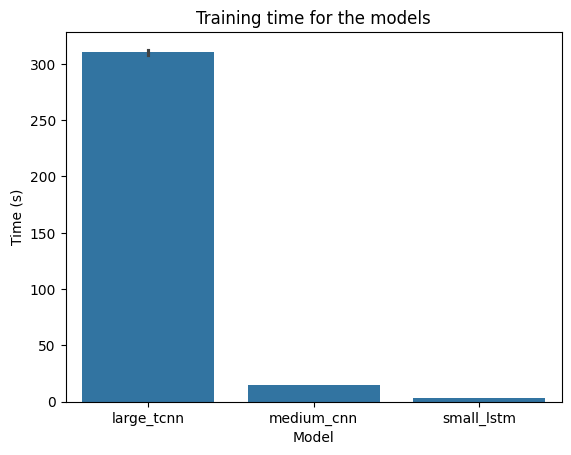

In [48]:
sns.barplot(x=df['tag'], y=df['time'])

# Set the labels and title
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.title('Training time for the models')

# Set the y-axis to log scale
#plt.yscale('log')

# Set the y-axis formatter to display integers
#plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useOffset=False))


# Show the plot
plt.show()
